In [2]:
# Permet de tout executer au lancement du notebook + conserver le notebook actif pendant 2h
from IPython.display import Javascript
from masquer import *
Javascript("""
function repeter(){
IPython.notebook.kernel.execute("a=1");
}
// execute a = 1 en python toutes les 8 minutes pendant 2h
let timerId = setInterval(() => repeter(), 4800);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); }, 7200000);

// Supprimer la taille limite pour la sortie d'une cellule
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};
IPython.notebook.kernel.execute("url = '" + window.location + "'");

// Exécuter toutes les cellule du notebook
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            
                
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
                Jupyter.actions.call('jupyter-notebook:hide-header')

        }
    );""")

<IPython.core.display.Javascript object>

# <span style="color:red;"><center>Architectures matérielles et systèmes d’exploitation</center></span>

## Introduction

De même qu'il n'est pas nécessaire de savoir comment fonctionne un moteur pour conduire une voiture, il n'est **pas nécessaire de savoir comment fonctionne un ordinateur pour l'utiliser**.

Cependant, si cela est vrai pour un conducteur occasionnel, ça l'est moins pour quelqu'un dont c'est le métier (chauffeur, pilote, ...). De même, sans que cela soit indispensable, il est **préférable qu'un programmeur connaisse quelques bases sur le fonctionnement d'un ordinateur** :
- Qu'est-ce qu'un **microprocesseur** ? Comment est-il fabriqué ? Comment le programme-t-on ?
- A quoi sert un **système d'exploitation** ? Y a-t-il une vie en dehors de l'interface graphique ? Un système d'exploitation est-il forcément payant ?
- Comment fonctionne un **réseau** ? A quoi servent les protocoles TCP/IP ?
- Qu'est ce qu'une **IHM** ? A quoi reconnait-on un **robot** ?

Voilà quelques unes des questions auxquelles nous allons essayer de répondre dans ce chapitre.

###  Programme officiel
|Contenus | Capacités attendues|
|:-|:-:|
|Modèle d’architecture séquentielle (von Neumann)|Distinguer les rôles et les caractéristiques des différents constituants d’une machine. Dérouler l’exécution d’une séquence d’instructions simples du type langage machine.|
|Transmission de données dans un réseau. Protocoles de communication. Architecture d’un réseau|Mettre en évidence l’intérêt du découpage des données en paquets et de leur encapsulation. Dérouler le fonctionnement d’un protocole simple de récupération de perte de paquets (bit alterné). Simuler ou mettre en oeuvre un réseau.|
|Systèmes d’exploitation|Identifier les fonctions d’un système d’exploitation. Utiliser les commandes de base en ligne de commande. Gérer les droits et permissions d’accès aux fichiers.|
|Périphériques d’entrée et de sortie. Interface Homme-Machine (IHM)|Identifier le rôle des capteurs et actionneurs. Réaliser par programmation une IHM répondant à un cahier des charges donné.|

## A. Modèle d'architecture de von Neumann

### I. Un peu d'histoire

#### 1. A la base était le transistor

Pour ceux qui s'interessent de près à l'**histoire de l'informatique**, vous pouvez consulter cet [historique rapide de l'avènement de l'ordinateur](https://isn-icn-ljm.pagesperso-orange.fr/1-NSI/res/res_histoire_1.pdf) ... 17 pages écrites serrées quand même !!

En ce qui nous concerne, on se contentera de rappeler que **l'essor de l'informatique moderne** (ordinateurs de deuxième génération) repose sur un **petit composant électronique** (quelques millimètres) appelé **transistor**. Aujourd'hui, on en trouve dans à peu près tous nos appareils électroniques. Si vous démontez votre machine à laver par exemple, vous devriez en trouver qui ressemblent à ça :
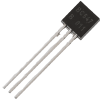

Ce type de transistor date de 1947 mais **avant ça on avait déjà fabriqué quelques ordinateurs** dans lesquels les transistors étaient remplacés par des **tubes à vides** (ordinateurs de première génération), au fonctionnement similaire mais nettement plus gros (de l'ordre du centimètre). En voici un exemple :
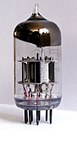

Mais pour **faire un ordinateur**, il faut **beaucoup de transistors**. Et plus l'ordinateur est puissant, plus il faut de transistors alors les premiers transistors étaient encore beaucoup trop gros. C'est alors que Jack Kilby invente en 1958 le **premier circuit intégré**, c'est-à-dire un **composant électronique** en silicium, à peine plus gros qu'un transistor classique, mais **regroupant déjà plusieurs dizaines de transistor** (ceci est un dessin moderne, pas l'original) :
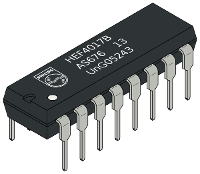
Cette invention va permettre la **révolution de la microélectronique** et l'apparition des ordinateurs de troisième génération.

#### 2. La course vers le nanomètre

Pendant les 50 ans qui ont suivi, l'industrie et la recherche en électronique du monde entier n'ont eu de cesse de chercher à **miniaturiser davantage les transistors** pour pouvoir en mettre un maximum dans un minimum de place. Et ça a drôlement bien fonctionné puisque pendant tout ce temps, nous avons pu **doubler tous les 2 ans le nombre de transistor présents sur une puce tout en gardant sa taille constante**.

C'est la fameuse **loi de Moore** :
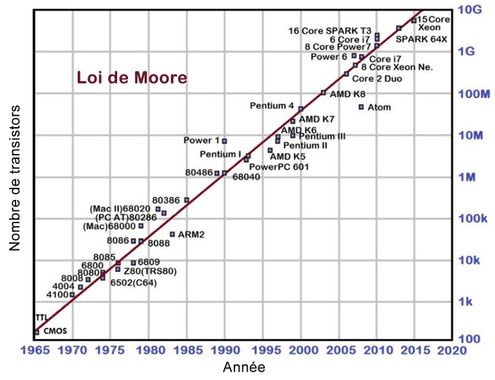

C'est au milieu des années 70 que deux jeunes américains agés d'à peine plus 20 ans, sans argent et ayant tous les deux abandonné leurs études pour se lancer dans le secteur florissant de la micro-informatique, fondent indépendamment, mais presque simultanément, leurs sociétés : **Microsoft** et **Apple**. Le premier s'appelle **Bill Gates** et le deuxième **Steeve Jobs** (en fait ils en sont les co-fondateurs), quelques dizaines d'années plus tard, ils seront tous les deux devenus multi-milliardaires.
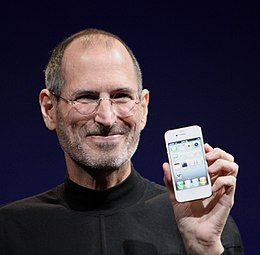

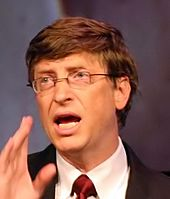

#### 3. Aujourd'hui

Aujourd'hui cette course folle à la **miniaturisation des transistors** (ordinateurs de quatrième génération) **atteint ses limites physiques** puisqu'en 2021 IBM a annoncé avoir atteint une **finesse de gravure (taille des transistors) de 2 nm**, soit environ 20 fois la taille d'un atome de silicium. C'est ainsi pas moins de **50 milliards de transistors** qui ont pu être placés sur une puce d'à peine **1 cm²**.

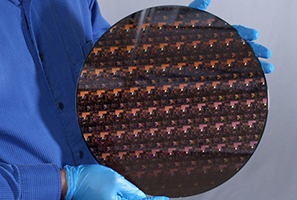

En diminuant encore la taille des transistors, **les phénomènes quantiques vont prendre le pas sur les lois de l'électricité classique** et le fonctionnement habituel des transistors ne sera donc plus possible.

Pour avoir vu au moins une fois dans votre vie à quoi ressemble le **processus de fabrication d'un microprocesseur**, vous pouvez visionner cette [vidéo](https://www.youtube.com/watch?v=NFr-WyytNfo).

Par ailleurs, cela fait un peu plus d'une dizaine d'années qu'il est devenu **difficile de continuer à augmenter la fréquence** (en gros la vitesse de calcul) des processeurs car leur consommation électrique est devenue telle qu'il est trop **difficile d'évacuer la chaleur produite dans le processeur par effe Joule**.

C'est pourquoi les fabricants ont commencé depuis quelques années à adopter la **stratégie des processeurs multicoeurs aussi appelés multiprocesseurs**. Un processeur multicoeurs **réunit plusieurs processeurs** (jusquà 18 et 8 par exemple sur un Snapdragon 845 installé dans un smartphone) **au sein d'une même puce** afin de les faire **travailler en parallèle** et ainsi **gagner de la puissance de calcul**.

### II. Les circuits combinatoires

#### 1. Où sont cachés les 0 et les 1 ?

Vous avez forcément déjà entendu (sûrement de ma part d'ailleurs) que **dans un ordinateur, on ne trouve que des 0 et des 1**.

En fait ce n'est pas tout à fait vrai. Ce qui est vrai, c'est qu'un **transistor ne fait que 2 choses** : soit il **laisse passer le courant**, soit **il le bloque**. Par conséquent, le **signal électrique** qui circule dans un microprocesseur ne peut avoir que **deux valeurs** : une **valeur basse** (proche de 0) et une **valeur haute** (positive non-nulle).

C'est parce qu'on **symbolise ces deux valeurs** ou ces deux états **par un 0 ou un 1** que l'on dit qu'un ordinateur ne manipule que des 0 et des 1. Mais on pourrait tout aussi bien dire qu'il ne manipule que des Vrai et des Faux ou des Oui et des Non ou n'importe quoi d'autre tant qu'il n'y a que 2 valeurs possibles. Dans tous les cas, **une information qui ne prend que 2 valeurs possibles est une information binaire** et les ordinateurs sont donc des **machines binaires**.

#### 2. L'algèbre de Boole

Il se trouve qu'un mathématicien britannique du XIXème siècle, dénommé *Georges Boole*, a posé les bases de toute une **théorie mathématique** manipulant justement ce genre d'**informations binaires**. Cette théorie porte le nom d'**algèbre de Boole**.

L'algèbre de Boole, comme toute théorie mathématique, permet de démontrer ses **théorèmes** et ses **propriétés remarquables**. Mais si on choisit d'appeler les 2 états possibles *Vrai* et *Faux*, on s'aperçoit alors que **faire de l'algèbre de Boole revient simplement à faire des raisonnements logiques**. Ainsi la **multiplication de booléens** (donnée binaire) s'apparente à l'opérateur logique *et* et l'**addition** au *ou* logique.

**Remarque :** En **théorie des ensembles**, ce serait l'**intersection** et l'**union**.

Plus fort encore, on peut démontrer qu'à l'aide de ces **premiers opérateurs logiques de base** (en fait un seul opérateur comme *Nand* ou *Nor* suffit), on peut **construire d'autres circuits logiques qui réalisent des opérations plus complexes**, comme **l'addition de nombres entiers écrits en binaire** par exemple.

Et comme finalement, on s'est aussi aperçu que les **transistors permettaient assez facilement de simuler en électronique le comportement de ces opérateurs logiques de base**. Il ne reste plus qu'à **associer des transistors dans le bon ordre** pour construire des **portes logiques** (opérateurs logiques élementaires) puis d'associer plusieurs portes pour obtenir des **circuits logiques** plus complexes (additionneur, multiplexeur, ...) qui, associés à leur tour, vont permettre de réaliser n'importe quelle **opération complexe sur les nombres binaires** (multiplication, division, ...).

Il ne reste alors plus qu'à faire un peu d'**algorithmique** pour que notre armée de **transistors réalise n'importe quelle tâche** comme trier des listes, faire une recherche dichotomique ou même de l'intelligence artificielle.

**Remarque :** Il existe en fait 2 catégories de circuits logiques, les **circuits combinatoires** (ceux dont nous allons parler) et les **circuits séquentiels** (dont nous ne parlerons pas ici). La différence principale est que les seconds vont se comporter différement en fonction de ce qu'ils ont fait avant alors que les premiers réagissent toujours de la même manière tant qu'on leur fournit le même signal en entrée.

#### 3. Les portes logiques

Ce sont des circuits combinatoires de base. On peut les représenter par leur table de vérité ou par un schéma.

Voici les **principales portes logiques** :

##### La porte NON

*Table de vérité :*

|Entrée E| Sortie S|
|:-:|:-:|
|0|1|
|1|0|

*Schéma :*
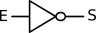

##### La porte OU (ou inclusif)

*Table de vérité :* (c'est le "ou" de "interdit de boire ou de manger")

|E1|E2|S|
|:-:|:-:|:-:|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|1|

*Schéma :*
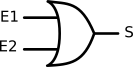

##### La porte ET

*Table de vérité :*

|E1|E2|S|
|:-:|:-:|:-:|
|0|0|0|
|0|1|0|
|1|0|0|
|1|1|1|

*Schéma :*
![porte_AND.png](attachment:porte_AND.png)

##### La porte XOR (ou exclusif)

*Table de vérité :* (c'est le "ou" de "fromage ou dessert")

|E1|E2|S|
|:-:|:-:|:-:|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

*Schéma :*
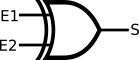

#### 4. Exemple de l'additionneur (ADD)

Voici le schéma d'un **circuit additionneur**. *E1* et *E2* sont les **bits d'entrée** que l'on souhaite additionner. On peut préciser avec *Cin* s'il faut prendre en compte la **retenue d'une addition précédente** et *Cout* indique s'il y aura une **retenue à la suite de cette addition**.
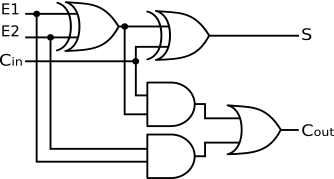

**Compléter** la table de vérité de ce circuit additionneur :

|E1|E2|Cin|Cout|S|
|:-:|:-:|:-:|:-:|:-:|
|0|0|0|0|0|
|0|0|1|0|1|
|0|1|0| | |
|0|1|1| | |
|1|0|0| | |
|1|0|1| | |
|1|1|0| | |
|1|1|1| | |

### III. Les constituants d'un ordinateur

#### 1. Le microprocesseur

Dans un ordinateur, le (ou les) **microprocesseur(s)** ou **CPU** (Central Processing Unit) est l'**endroit où sont effectués tous les calculs** (ou presque). Nous avons vu qu'il est essentiellement **constitué de transistors** mais il est aussi **divisé en plusieurs sous-parties** :
- Les **registres** qui sont de **petites mémoires** (quelques octets)  mais **très rapides d'accés** (environ 1 ns), utilisées pour stocker les données lors des calculs.
- L'**unité arihtmétique et logique** (UAL ou ALU en anglais) qui **réalise les calculs**.
- L'**unité de commande** qui **dirige l'UAL et les registres** pour savoir à quel endroit et à quel moment lire/écrire dans les registres ou faire un calcul.
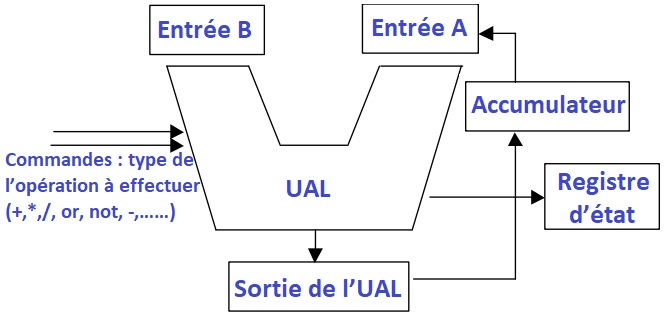

La **fréquence d'horloge** d'un processeur récent est de l'ordre de **quelques GigaHertz**. Cette fréquence indique le **nombre de cycles que le processeur est capable d'effectuer chaque seconde** (plusieurs milliards donc). Certaines opérations lourdes nécessitent plusieurs cycles pour être achevées (multiplication de nombres flottants) alors d'autres peuvent être exécutées plusieurs fois en un seul cycle. Mais cela dépend aussi du type de processeur (RISC ou CISC), de la mémoire associée, ...

Pour **fournir des instructions à l'unité de commande**, on utilise un **langage machine** (langage de bas niveau) appelé **assembleur**. Chaque **instruction** donnée en assembleur correspond à une **opération de base pour le microprocesseur** codée sous la forme d'un **nombre binaire** appelé **instruction machine**.

Quand vous compilez un programme Python, vous demandez en fait au **compilateur de traduire votre programme en langage machine** pour qu'il puisse être exécuté par le microprocesseur.

#### 2. La mémoire

Les **registres du microprocesseur sont beaucoup trop petits** pour contenir tout un programme ou un ensemble de données à traiter. Il faut donc **ajouter de la mémoire** au microprocesseur pour qu'un ordinateur puisse fonctionner.

Il existe de **nombreux types de mémoires** (vive ou morte, RAM ou ROM, cache ...) mais le principal allié du microprocesseur est la **mémoire RAM** (Random Access Memory) ou **mémoire vive**. Beaucoup **plus rapide d'accès que le disque dur** (mémoire morte), elle permet de **stocker les programmes en cours d'éxécution ainsi que leurs données associées**. Son rôle est de fournir le plus rapidement possible au microprocesseur toutes les données dont il a besoin pour effectuer ses calculs.

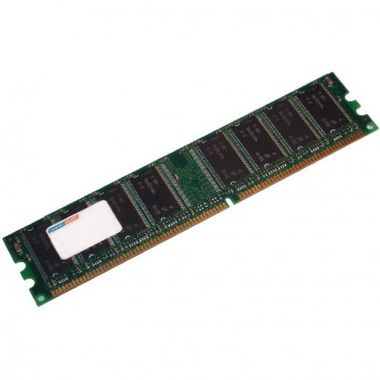

Comme pour les registres, les **composants élémentaires de la mémoire sont désignés par une adresse unique correspondant à 1 octet de données**.

Dans la **mémoire vive**, les données (bits) sont stockées à l'aide de **condensateurs microscopiques chargés** (valeur 1) **ou déchargés** (valeur 0). Mais ils ont **besoin d'être alimentés pour conserver leur charge**. C'est pourquoi **toutes les données de la mémoire vive sont perdues lorsque l'ordinateur est mis hors tension** : on dit que cette mémoire est **volatile**.

Au contraire, dans la **mémoire morte**, disques de type **HDD** (Hard Disk Drive) ou **SSD** (Solid State Device) ou encore **clés USB**, ce sont l'équivalent de **petits aimants microscopiques qui sont orientés dans un sens ou un autre** pour coder les 0 et les 1. Ces aimants **gardent leur orientation lorsque le disque n'est pas alimenté**.

La technologie fait que la **taille de la mémoire vive ne peut pas être aussi importante que celle de la mémoire morte**, par contre sa **vitesse d'accès est beaucoup plus grande** (temps d'accès de 100 ns environ au lieu de 20 ms pour la mémoire morte).

**Remarques :**
- Il existe aussi la **mémoire ROM** (Read Only Memory). C'est une petite mémoire incluse à la fabrication de l'ordinateur et qui comporte les **instructions nécessaires à son démarrage**. Elle peut seulement être lue et ne peut donc pas être effacée, y compris lors de la mise hors tension.
- Quant à la **mémoire cache**, c'est une mémoire assez **semblable à la RAM** (SRAM) mais **encore plus rapide d'accès** (environ 10 ns) qui peut être située à l'intérieur même du processeur. Sa **taille est encore plus limitée**.

Pour les **registres**, on utilise souvent des **circuits bascules** dont le schéma est le suivant :
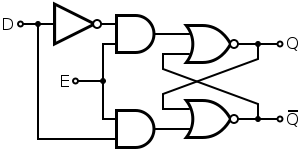

Ces circuits sont **formés à partir de portes logiques et donc de transistors**.

#### 3. Les bus

Entre les différens éléments de l'ordinateur, les **données circulent dans des bus** (plusieurs fils électriques en parallèle). Il en existe de plusieurs sortes :
- Les **bus d'adresses** qui transportent les **adresses mémoires **à utiliser pour lire ou écrire des données.
- Les **bus de données** qui transportent les **données à manipuler**.
- Les **bus de contrôle** qui permettent de **donner des ordres** aux différents élément (lire, écrire, additionner, ...).
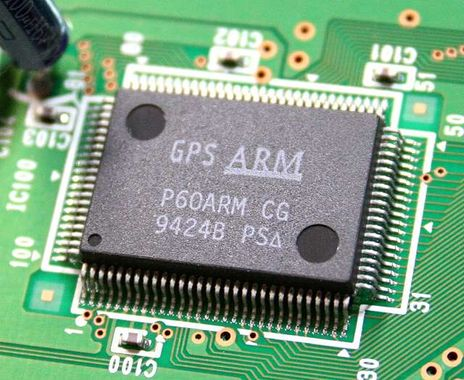

#### 4. La carte mère

La **carte mère** est une **carte électronique qui permet d'interconnecter tous les composants d'un ordinateur**.

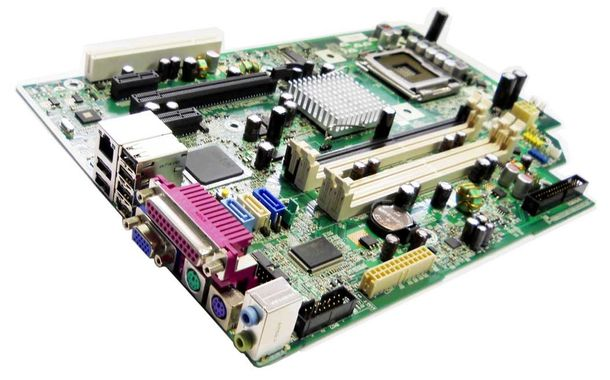

C'est sur elle que **se fixent le microprocesseur** (à l'aide d'un socket spécialement dédié), les **barettes de RAM** ou encore la **mémoire ROM**. Mais elle **comporte aussi le plus souvent d'autres puces** dédiées au **traitement du son**, à la **connexion réseau** ou encore à **la vidéo**. Au besoin, ces tâches peuvent également être confiées à des **cartes d'extension plus puissantes** qui se fixent aussi sur la carte mère (carte son, carte vidéo, ...).

Les **périphériques d'entrée et de sortie** (clavier, souris, écran, ...) sont aussi **connectées à la carte mère** qui fait ainsi le **lien entre ces périphériques et le microprocesseur** en passant par divers **formats de connecteurs** (USB, VGA, HDMI, thunderbolt, ...).

### IV. Mais alors von Neumann, c'est quoi ?

En fait, **l'architecture décrite jusqu'ici est l'architecture de von Neumann**. Définie en 1945 par John von Neumann, elle est encore **utilisée par tous les ordinateurs actuels**.

Sa **particularité réside dans le fait que les **données et les programmes à exécuter sont stockés ensemble dans la même mémoire** alors qu'avant ça, on utilisait deux mémoires séparées (architecture d'Harvard).

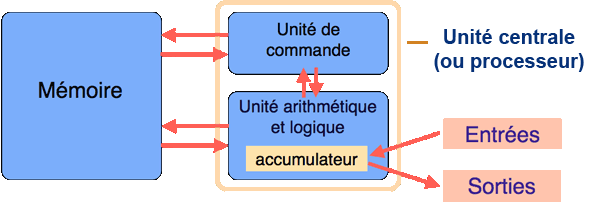

Ca n'a l'air de rien mais cela **change fondamentalement le fonctionnement d'un ordinateur**. En particulier, c'est cette architecture qui **permet de faire fonctionner un système d'exploitation** (programme principal capable de lancer d'autres programmes situés en mémoire) ou **un compilateur** (programme capable de transformer un fichier texte en programme exécutable).

Dans le prochain [TD](TD_06_1.ipynb), nous allons essayer de voir d'un peu plus près comment fonctionne un programme un assembleur.